# Walmart Sales Prediction - Exploratory Data Analysis

This notebook performs comprehensive exploratory data analysis on the Walmart sales dataset.

## Table of Contents
1. [Data Loading](#data-loading)
2. [Data Overview](#data-overview)
3. [Statistical Analysis](#statistical-analysis)
4. [Data Visualization](#data-visualization)
5. [Correlation Analysis](#correlation-analysis)
6. [Time Series Analysis](#time-series-analysis)
7. [Holiday Impact Analysis](#holiday-impact-analysis)
8. [Key Insights](#key-insights)

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Data Loading <a id='data-loading'></a>

In [2]:
# Load the dataset
df = pd.read_csv('../Walmart.csv')
print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Rows: {df.shape[0]:,}, Columns: {df.shape[1]}")

Dataset loaded successfully!
Shape: (6435, 8)
Rows: 6,435, Columns: 8


## 2. Data Overview <a id='data-overview'></a>

In [3]:
# Display first few rows
print("First 10 rows of the dataset:")
df.head(10)

First 10 rows of the dataset:


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [4]:
# Data types and info
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
# Check for missing values
print("Missing Values:")
missing = df.isnull().sum()
if missing.sum() == 0:
 print("✓ No missing values found!")
else:
 print(missing[missing > 0])

Missing Values:
✓ No missing values found!


In [6]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates == 0:
 print("✓ No duplicate rows found!")

Number of duplicate rows: 0
✓ No duplicate rows found!


In [7]:
# Parse dates
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
print("Date range:")
print(f" Start: {df['Date'].min().strftime('%B %d, %Y')}")
print(f" End: {df['Date'].max().strftime('%B %d, %Y')}")
print(f" Duration: {(df['Date'].max() - df['Date'].min()).days} days")

Date range:
  Start: February 05, 2010
  End: October 26, 2012
  Duration: 994 days


In [8]:
# Unique values
print("\nUnique Values:")
print(f" Stores: {df['Store'].nunique()}")
print(f" Weeks: {df['Date'].nunique()}")
print(f" Holiday Flags: {df['Holiday_Flag'].unique()}")


Unique Values:
  Stores: 45
  Weeks: 143
  Holiday Flags: [0 1]


## 3. Statistical Analysis <a id='statistical-analysis'></a>

In [9]:
# Statistical summary
print("Statistical Summary:")
df.describe().round(2)

Statistical Summary:


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.00,6435,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00
mean,23.00,2011-06-17 00:00:00,1046964.88,0.07,60.66,3.36,171.58,8.00
min,1.00,2010-02-05 00:00:00,209986.25,0.00,-2.06,2.47,126.06,3.88
25%,12.00,2010-10-08 00:00:00,553350.10,0.00,47.46,2.93,131.74,6.89
50%,23.00,2011-06-17 00:00:00,960746.04,0.00,62.67,3.44,182.62,7.87
75%,34.00,2012-02-24 00:00:00,1420158.66,0.00,74.94,3.74,212.74,8.62
max,45.00,2012-10-26 00:00:00,3818686.45,1.00,100.14,4.47,227.23,14.31
std,12.99,NaN,564366.62,0.26,18.44,0.46,39.36,1.88


In [10]:
# Target variable (Weekly_Sales) analysis
print("Weekly Sales Statistics:")
print(f" Mean: ${df['Weekly_Sales'].mean():,.2f}")
print(f" Median: ${df['Weekly_Sales'].median():,.2f}")
print(f" Std Dev: ${df['Weekly_Sales'].std():,.2f}")
print(f" Min: ${df['Weekly_Sales'].min():,.2f}")
print(f" Max: ${df['Weekly_Sales'].max():,.2f}")
print(f" Range: ${df['Weekly_Sales'].max() - df['Weekly_Sales'].min():,.2f}")

Weekly Sales Statistics:
  Mean: $1,046,964.88
  Median: $960,746.04
  Std Dev: $564,366.62
  Min: $209,986.25
  Max: $3,818,686.45
  Range: $3,608,700.20


## 4. Data Visualization <a id='data-visualization'></a>

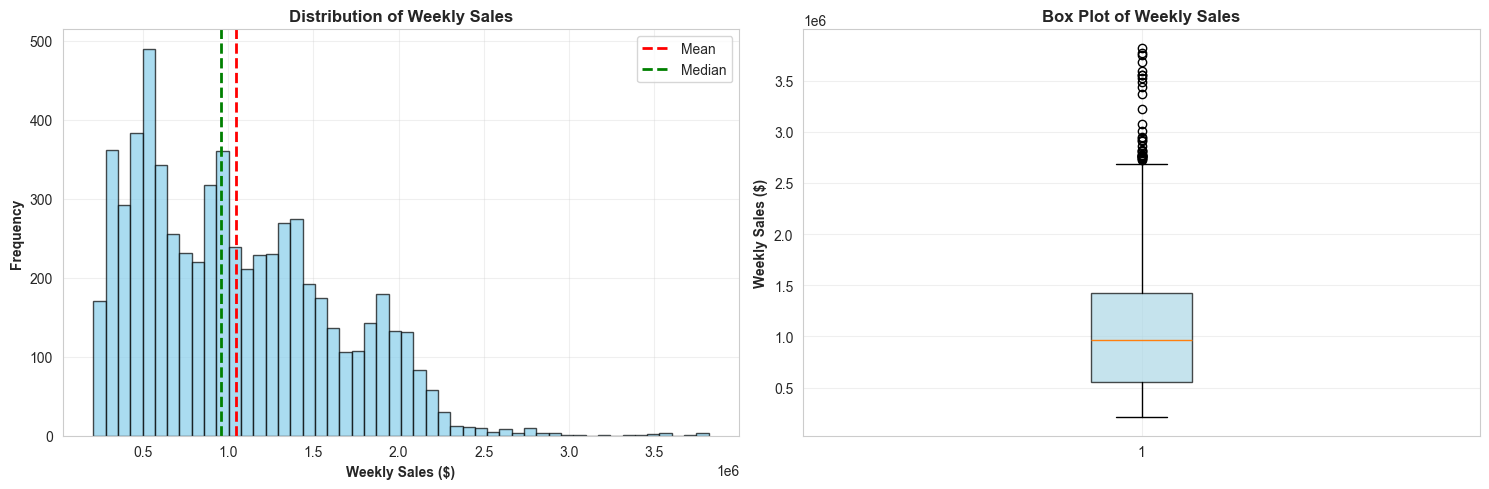

In [11]:
# Distribution of Weekly Sales
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df['Weekly_Sales'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].set_xlabel('Weekly Sales ($)', fontweight='bold')
axes[0].set_ylabel('Frequency', fontweight='bold')
axes[0].set_title('Distribution of Weekly Sales', fontweight='bold', fontsize=12)
axes[0].axvline(df['Weekly_Sales'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0].axvline(df['Weekly_Sales'].median(), color='green', linestyle='--', linewidth=2, label='Median')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(df['Weekly_Sales'], vert=True, patch_artist=True,
 boxprops=dict(facecolor='lightblue', alpha=0.7))
axes[1].set_ylabel('Weekly Sales ($)', fontweight='bold')
axes[1].set_title('Box Plot of Weekly Sales', fontweight='bold', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

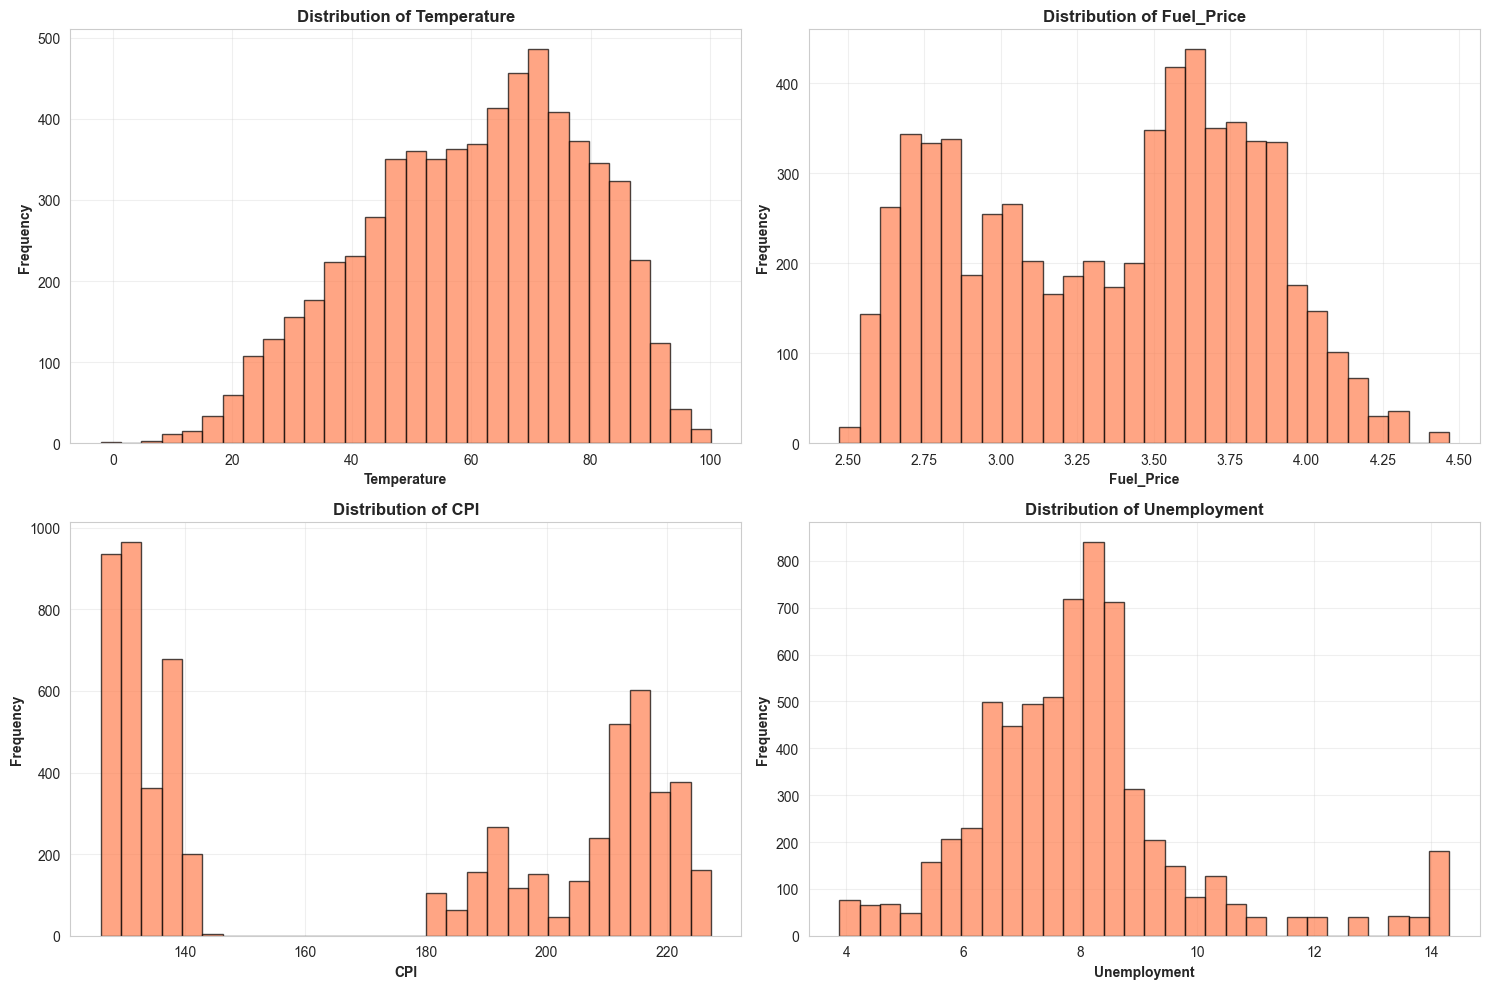

In [12]:
# Distribution of numerical features
numerical_cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
 axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='coral')
 axes[idx].set_xlabel(col, fontweight='bold')
 axes[idx].set_ylabel('Frequency', fontweight='bold')
 axes[idx].set_title(f'Distribution of {col}', fontweight='bold')
 axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

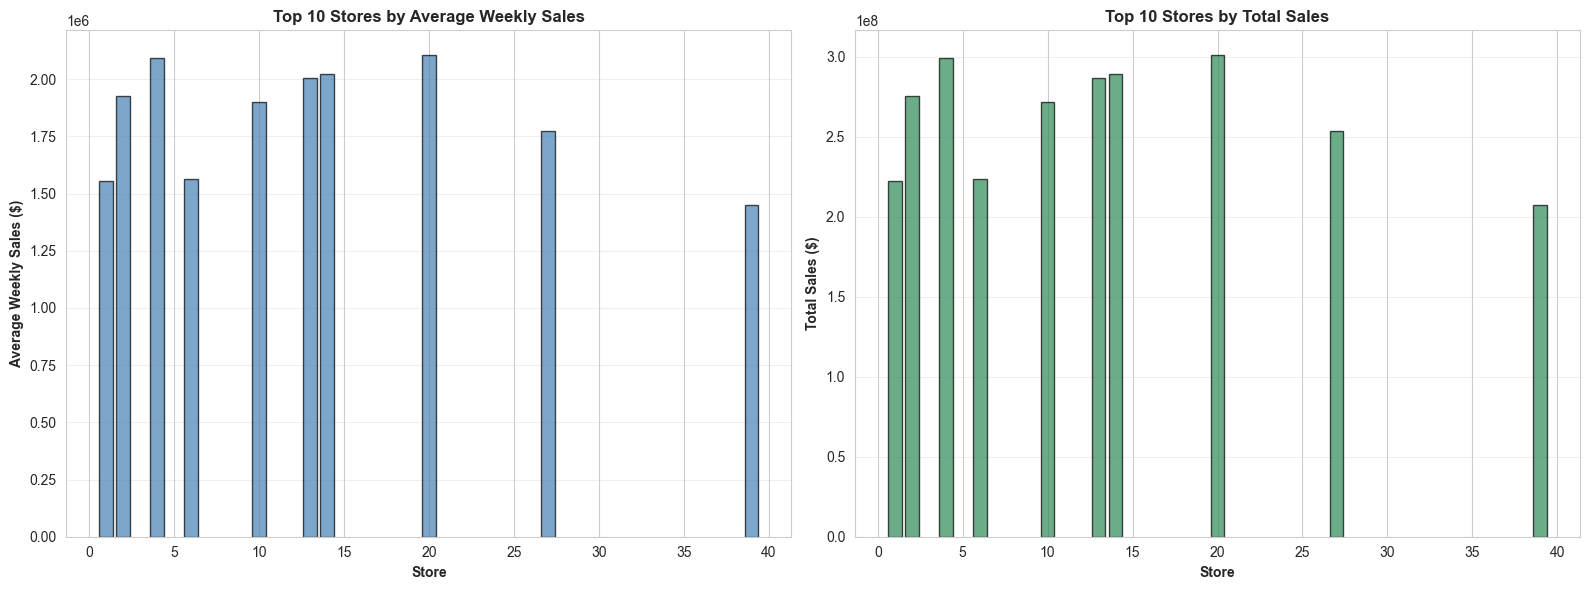

In [13]:
# Sales by Store
store_sales = df.groupby('Store')['Weekly_Sales'].agg(['mean', 'sum']).reset_index()
store_sales = store_sales.sort_values('mean', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Average sales by store
axes[0].bar(store_sales['Store'].head(10), store_sales['mean'].head(10),  color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Store', fontweight='bold')
axes[0].set_ylabel('Average Weekly Sales ($)', fontweight='bold')
axes[0].set_title('Top 10 Stores by Average Weekly Sales', fontweight='bold', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# Total sales by store
axes[1].bar(store_sales['Store'].head(10), store_sales['sum'].head(10),  color='seagreen', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Store', fontweight='bold')
axes[1].set_ylabel('Total Sales ($)', fontweight='bold')
axes[1].set_title('Top 10 Stores by Total Sales', fontweight='bold', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Correlation Analysis <a id='correlation-analysis'></a>

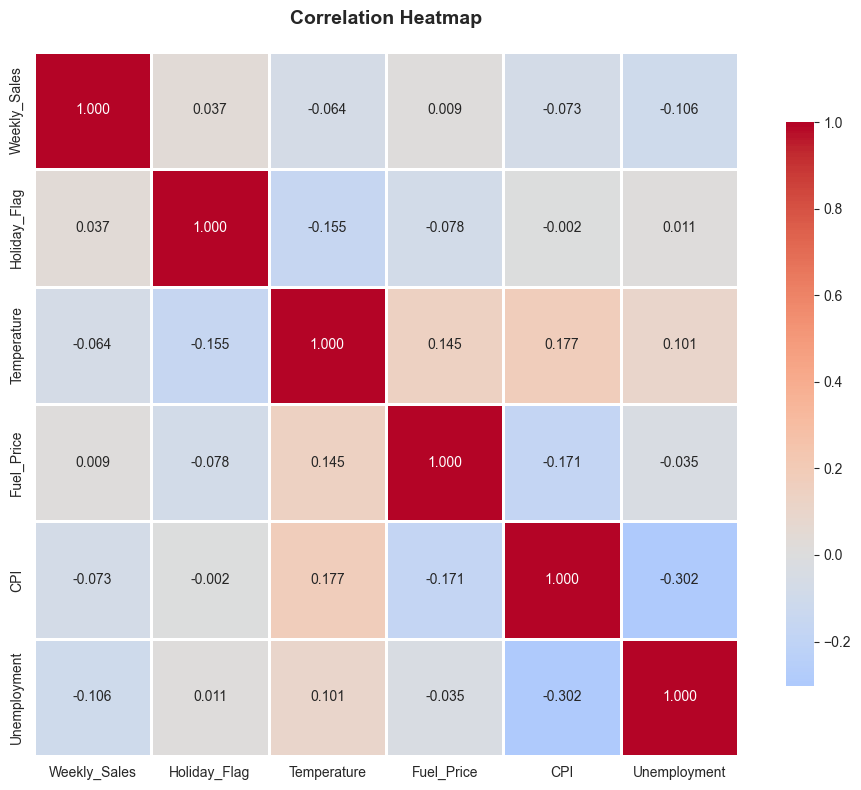


Correlations with Weekly_Sales:
  Holiday_Flag: 0.0369
  Fuel_Price: 0.0095
  Temperature: -0.0638
  CPI: -0.0726
  Unemployment: -0.1062


In [14]:
# Correlation matrix
numerical_features = ['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm',  center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap', fontweight='bold', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Show correlations with Weekly_Sales
print("\nCorrelations with Weekly_Sales:")
sales_corr = correlation_matrix['Weekly_Sales'].sort_values(ascending=False)
for feature, corr in sales_corr.items():
 if feature != 'Weekly_Sales':
 print(f" {feature}: {corr:.4f}")

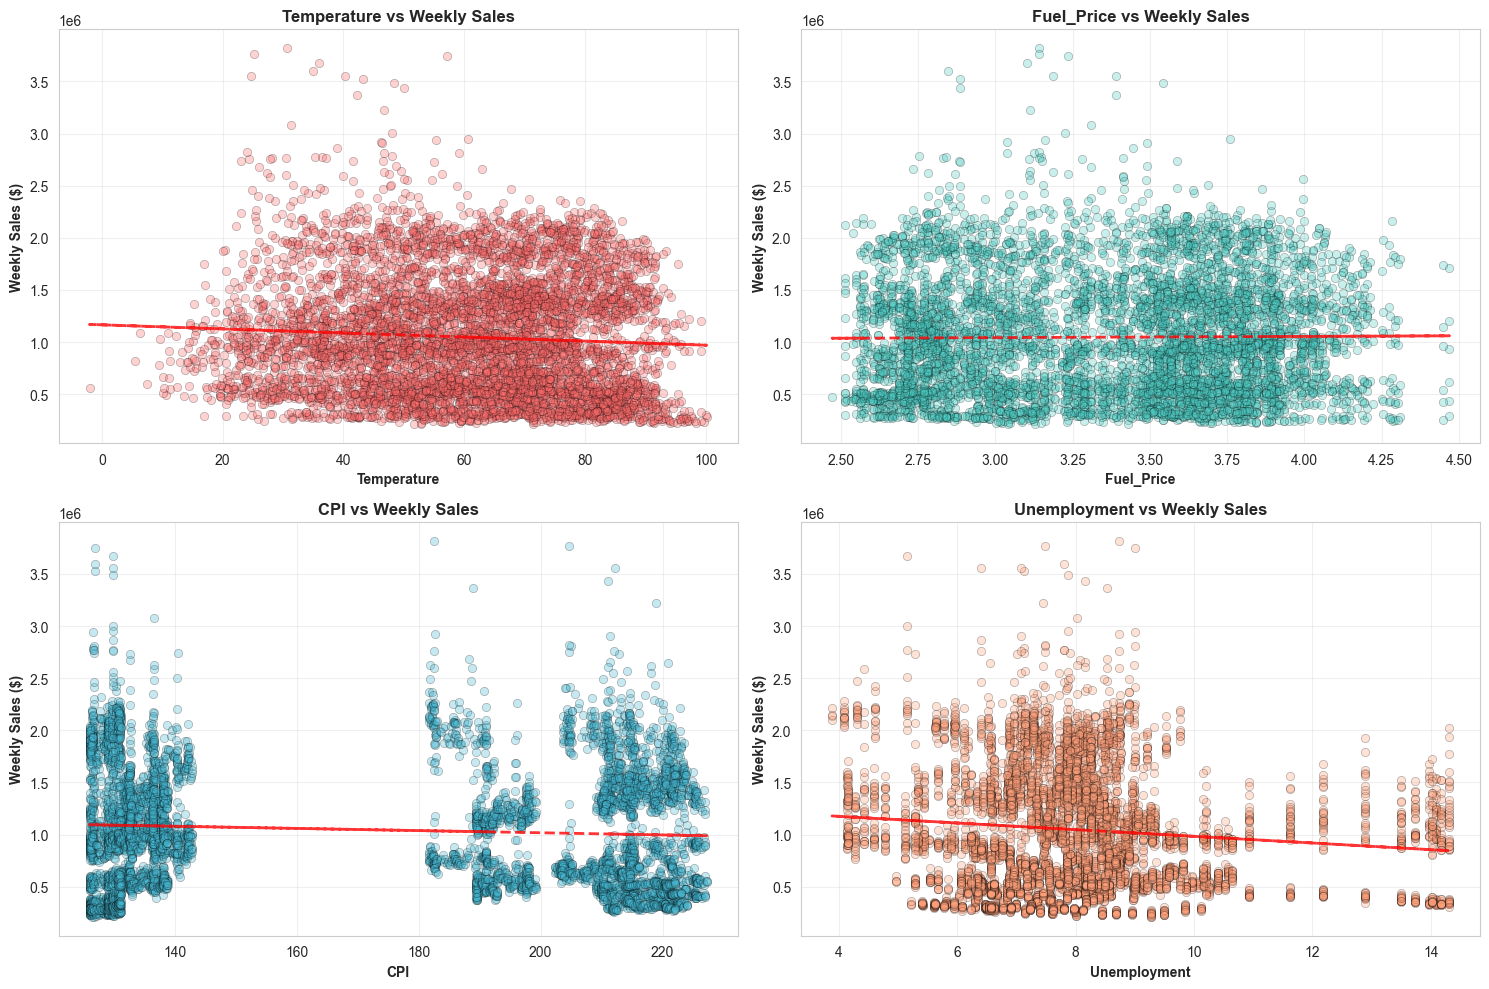

In [15]:
# Scatter plots of features vs Weekly_Sales
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

for idx, (feature, color) in enumerate(zip(features, colors)):
 axes[idx].scatter(df[feature], df['Weekly_Sales'], alpha=0.3, color=color, edgecolors='black', linewidths=0.5)
 axes[idx].set_xlabel(feature, fontweight='bold')
 axes[idx].set_ylabel('Weekly Sales ($)', fontweight='bold')
 axes[idx].set_title(f'{feature} vs Weekly Sales', fontweight='bold')
 axes[idx].grid(True, alpha=0.3)
  # Add trend line
 z = np.polyfit(df[feature], df['Weekly_Sales'], 1)
 p = np.poly1d(z)
 axes[idx].plot(df[feature], p(df[feature]), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

## 6. Time Series Analysis <a id='time-series-analysis'></a>

In [16]:
# Extract date features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
df['Week'] = df['Date'].dt.isocalendar().week

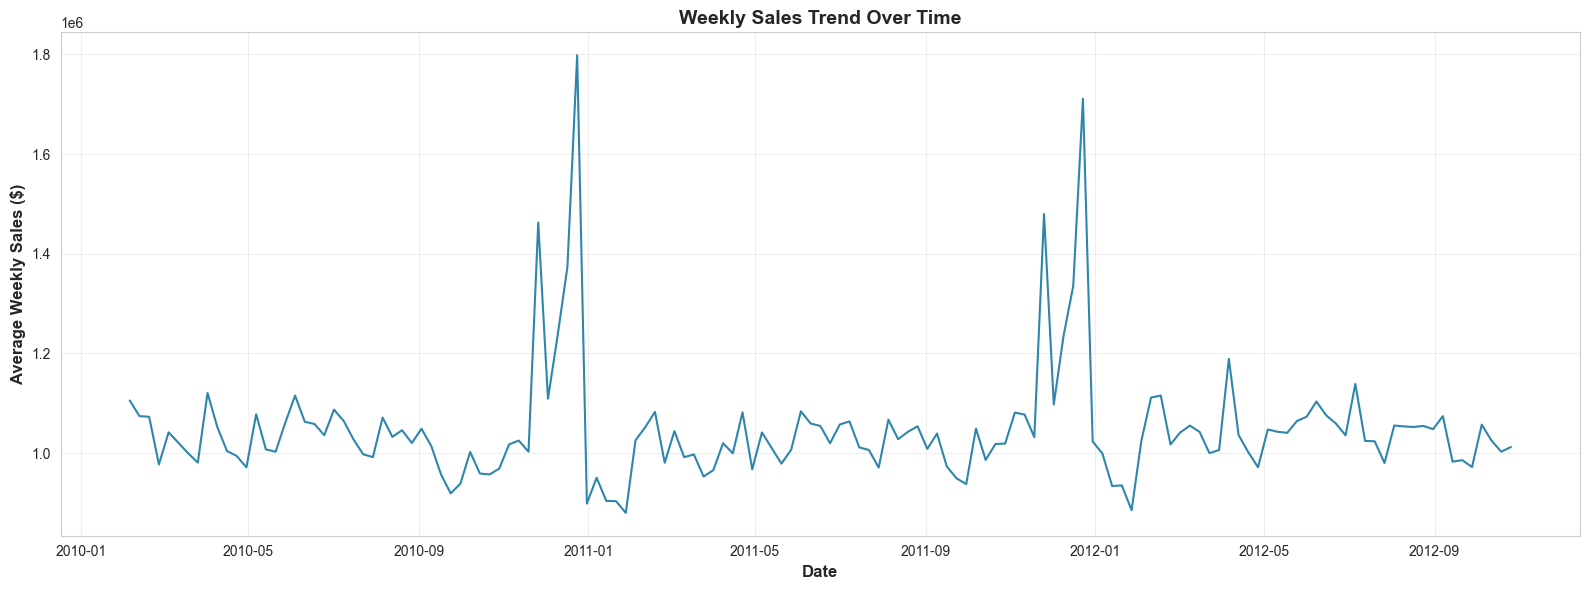

In [17]:
# Weekly sales trend over time
weekly_sales = df.groupby('Date')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(16, 6))
plt.plot(weekly_sales['Date'], weekly_sales['Weekly_Sales'], linewidth=1.5, color='#2E86AB')
plt.xlabel('Date', fontweight='bold', fontsize=12)
plt.ylabel('Average Weekly Sales ($)', fontweight='bold', fontsize=12)
plt.title('Weekly Sales Trend Over Time', fontweight='bold', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

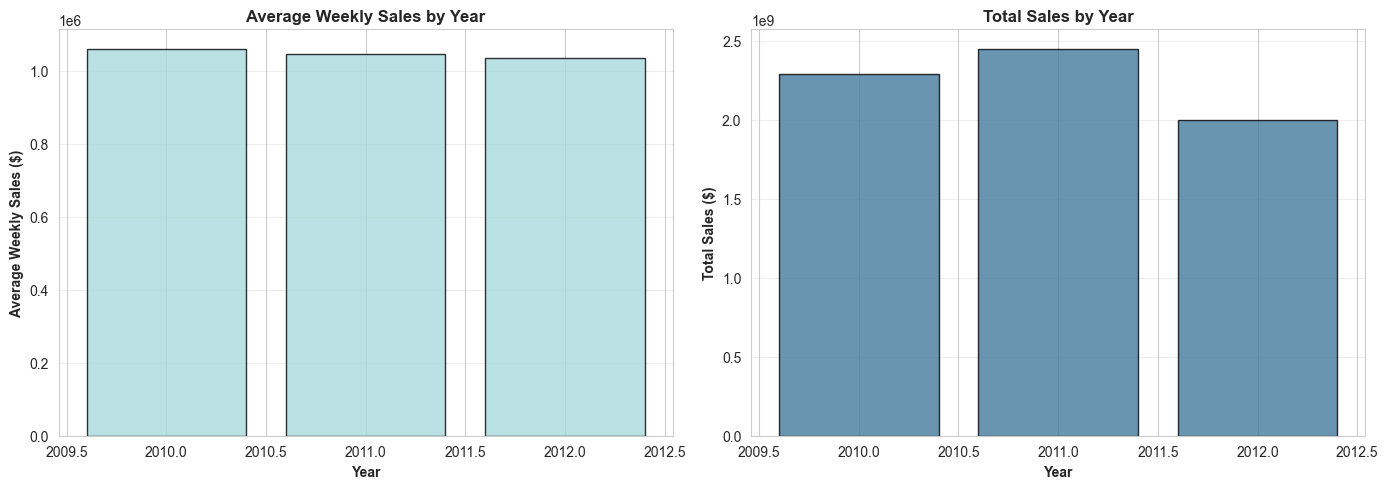

In [18]:
# Sales by Year
yearly_sales = df.groupby('Year')['Weekly_Sales'].agg(['mean', 'sum']).reset_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(yearly_sales['Year'], yearly_sales['mean'], color='#A8DADC', edgecolor='black', alpha=0.8)
axes[0].set_xlabel('Year', fontweight='bold')
axes[0].set_ylabel('Average Weekly Sales ($)', fontweight='bold')
axes[0].set_title('Average Weekly Sales by Year', fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

axes[1].bar(yearly_sales['Year'], yearly_sales['sum'], color='#457B9D', edgecolor='black', alpha=0.8)
axes[1].set_xlabel('Year', fontweight='bold')
axes[1].set_ylabel('Total Sales ($)', fontweight='bold')
axes[1].set_title('Total Sales by Year', fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

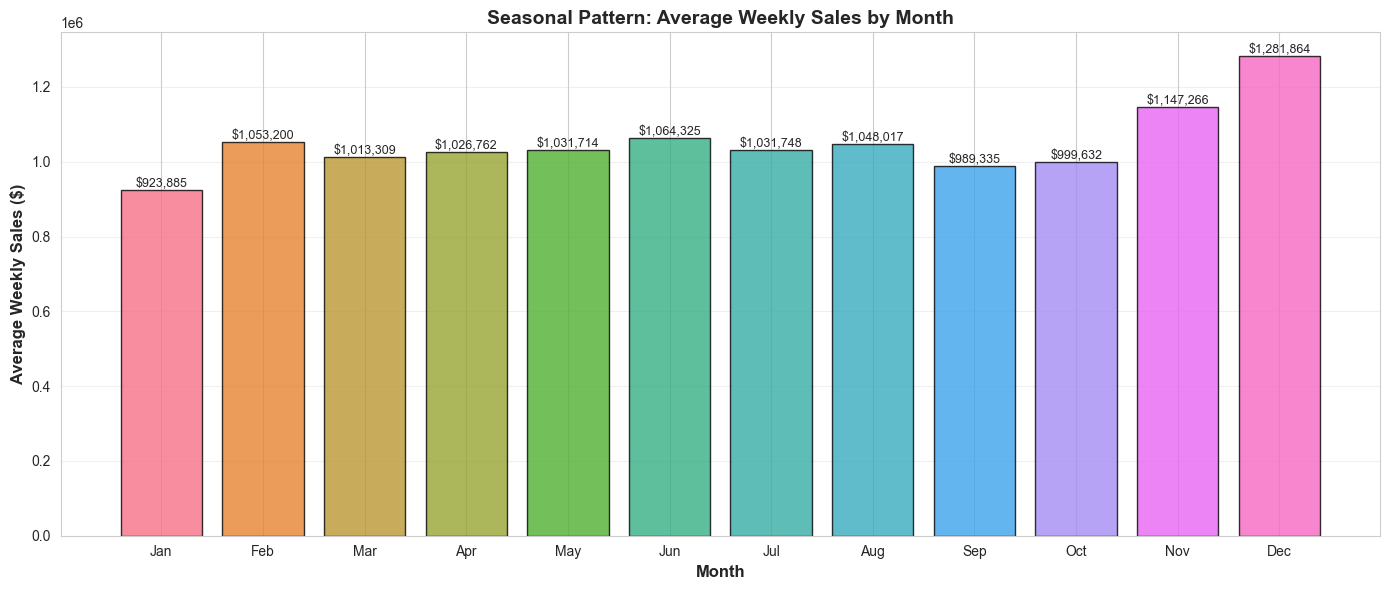

In [19]:
# Sales by Month (Seasonal Pattern)
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean().reset_index()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(14, 6))
colors = sns.color_palette('husl', 12)
bars = plt.bar(monthly_sales['Month'], monthly_sales['Weekly_Sales'], color=colors, edgecolor='black', alpha=0.8)
plt.xlabel('Month', fontweight='bold', fontsize=12)
plt.ylabel('Average Weekly Sales ($)', fontweight='bold', fontsize=12)
plt.title('Seasonal Pattern: Average Weekly Sales by Month', fontweight='bold', fontsize=14)
plt.xticks(monthly_sales['Month'], month_names)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
 height = bar.get_height()
 plt.text(bar.get_x() + bar.get_width()/2., height,
 f'${height:,.0f}',
 ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

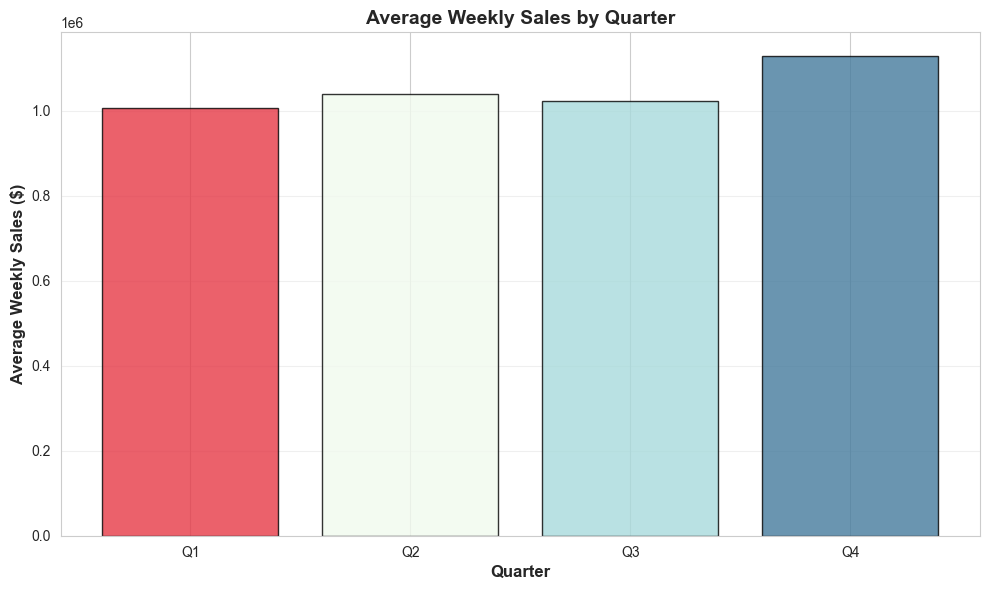

In [20]:
# Sales by Quarter
quarterly_sales = df.groupby('Quarter')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(quarterly_sales['Quarter'], quarterly_sales['Weekly_Sales'],  color=['#E63946', '#F1FAEE', '#A8DADC', '#457B9D'], edgecolor='black', alpha=0.8)
plt.xlabel('Quarter', fontweight='bold', fontsize=12)
plt.ylabel('Average Weekly Sales ($)', fontweight='bold', fontsize=12)
plt.title('Average Weekly Sales by Quarter', fontweight='bold', fontsize=14)
plt.xticks([1, 2, 3, 4], ['Q1', 'Q2', 'Q3', 'Q4'])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 7. Holiday Impact Analysis <a id='holiday-impact-analysis'></a>

In [21]:
# Holiday vs Non-Holiday Sales
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].agg(['mean', 'count', 'sum']).reset_index()
holiday_sales['Holiday_Flag'] = holiday_sales['Holiday_Flag'].map({0: 'Non-Holiday', 1: 'Holiday'})

print("Holiday Impact on Sales:")
print(holiday_sales)
print(f"\nPercentage of holiday weeks: {(df['Holiday_Flag'].sum() / len(df)) * 100:.2f}%")

Holiday Impact on Sales:
  Holiday_Flag          mean  count           sum
0  Non-Holiday  1.041256e+06   5985  6.231919e+09
1      Holiday  1.122888e+06    450  5.052996e+08

Percentage of holiday weeks: 6.99%


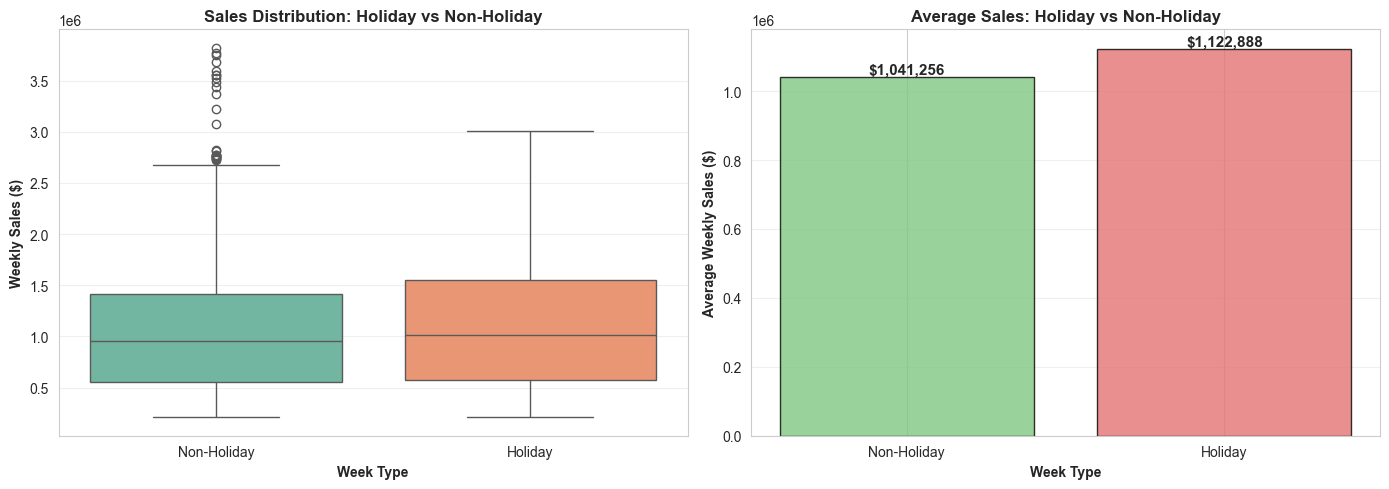

In [22]:
# Visualize Holiday Impact
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
df['Holiday'] = df['Holiday_Flag'].map({0: 'Non-Holiday', 1: 'Holiday'})
sns.boxplot(data=df, x='Holiday', y='Weekly_Sales', ax=axes[0], palette='Set2')
axes[0].set_xlabel('Week Type', fontweight='bold')
axes[0].set_ylabel('Weekly Sales ($)', fontweight='bold')
axes[0].set_title('Sales Distribution: Holiday vs Non-Holiday', fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Bar plot
bars = axes[1].bar(holiday_sales['Holiday_Flag'], holiday_sales['mean'],  color=['#81C784', '#E57373'], edgecolor='black', alpha=0.8)
axes[1].set_xlabel('Week Type', fontweight='bold')
axes[1].set_ylabel('Average Weekly Sales ($)', fontweight='bold')
axes[1].set_title('Average Sales: Holiday vs Non-Holiday', fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars:
 height = bar.get_height()
 axes[1].text(bar.get_x() + bar.get_width()/2., height,
 f'${height:,.0f}',
 ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

In [23]:
# Statistical test for holiday impact
from scipy import stats

holiday_sales_data = df[df['Holiday_Flag'] == 1]['Weekly_Sales']
non_holiday_sales_data = df[df['Holiday_Flag'] == 0]['Weekly_Sales']

t_stat, p_value = stats.ttest_ind(holiday_sales_data, non_holiday_sales_data)

print("\nT-Test Results (Holiday vs Non-Holiday):")
print(f" T-statistic: {t_stat:.4f}")
print(f" P-value: {p_value:.6f}")

if p_value < 0.05:
 print("\n✓ There is a statistically significant difference between holiday and non-holiday sales.")
else:
 print("\n✗ No statistically significant difference found.")


T-Test Results (Holiday vs Non-Holiday):
  T-statistic: 2.9609
  P-value: 0.003079

✓ There is a statistically significant difference between holiday and non-holiday sales.


## 8. Key Insights <a id='key-insights'></a>

In [24]:
print("=" * 70)
print("KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("=" * 70)

print("\n1. DATASET OVERVIEW:")
print(f" - Total records: {len(df):,}")
print(f" - Number of stores: {df['Store'].nunique()}")
print(f" - Time period: {df['Date'].min().strftime('%B %Y')} to {df['Date'].max().strftime('%B %Y')}")
print(f" - No missing values ✓")

print("\n2. SALES STATISTICS:")
print(f" - Average weekly sales: ${df['Weekly_Sales'].mean():,.2f}")
print(f" - Total sales across all stores: ${df['Weekly_Sales'].sum():,.2f}")
print(f" - Sales range: ${df['Weekly_Sales'].min():,.2f} to ${df['Weekly_Sales'].max():,.2f}")

print("\n3. SEASONAL PATTERNS:")
best_month = monthly_sales.loc[monthly_sales['Weekly_Sales'].idxmax(), 'Month']
worst_month = monthly_sales.loc[monthly_sales['Weekly_Sales'].idxmin(), 'Month']
print(f" - Highest sales month: {month_names[int(best_month)-1]}")
print(f" - Lowest sales month: {month_names[int(worst_month)-1]}")

best_quarter = quarterly_sales.loc[quarterly_sales['Weekly_Sales'].idxmax(), 'Quarter']
print(f" - Best performing quarter: Q{int(best_quarter)}")

print("\n4. HOLIDAY IMPACT:")
holiday_avg = df[df['Holiday_Flag'] == 1]['Weekly_Sales'].mean()
non_holiday_avg = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].mean()
diff_pct = ((holiday_avg - non_holiday_avg) / non_holiday_avg) * 100
print(f" - Holiday weeks average: ${holiday_avg:,.2f}")
print(f" - Non-holiday weeks average: ${non_holiday_avg:,.2f}")
print(f" - Difference: {diff_pct:+.2f}%")

print("\n5. CORRELATIONS WITH SALES:")
for feature in ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']:
 corr = df[[feature, 'Weekly_Sales']].corr().iloc[0, 1]
 print(f" - {feature}: {corr:.4f}")

print("\n6. TOP PERFORMING STORES:")
top_stores = df.groupby('Store')['Weekly_Sales'].mean().nlargest(3)
for rank, (store, sales) in enumerate(top_stores.items(), 1):
 print(f" {rank}. Store {store}: ${sales:,.2f} average")

print("\n" + "=" * 70)

KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS

1. DATASET OVERVIEW:
   - Total records: 6,435
   - Number of stores: 45
   - Time period: February 2010 to October 2012
   - No missing values ✓

2. SALES STATISTICS:
   - Average weekly sales: $1,046,964.88
   - Total sales across all stores: $6,737,218,987.11
   - Sales range: $209,986.25 to $3,818,686.45

3. SEASONAL PATTERNS:
   - Highest sales month: Dec
   - Lowest sales month: Jan
   - Best performing quarter: Q4

4. HOLIDAY IMPACT:
   - Holiday weeks average: $1,122,887.89
   - Non-holiday weeks average: $1,041,256.38
   - Difference: +7.84%

5. CORRELATIONS WITH SALES:
   - Temperature: -0.0638
   - Fuel_Price: 0.0095
   - CPI: -0.0726
   - Unemployment: -0.1062

6. TOP PERFORMING STORES:
   1. Store 20: $2,107,676.87 average
   2. Store 4: $2,094,712.96 average
   3. Store 14: $2,020,978.40 average



## Conclusion

This exploratory data analysis has revealed several important insights:

1. **Data Quality**: The dataset is complete with no missing values
2. **Temporal Patterns**: Clear seasonal trends exist in sales data
3. **Holiday Effect**: Holidays have a measurable impact on sales
4. **Store Variation**: Significant differences exist between stores
5. **Feature Relationships**: Various economic factors show correlations with sales

These insights will guide feature engineering and model selection in the next phase.